# Problem statement
Search pattern of similar car recommendation

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

# Reading dataset

In [2]:
import pandas as pd
A=pd.read_csv("C:/Users/Admin/Desktop/ETL class/machine learning/13-08-2022(Logistic regression)/Cars93.csv")



pd.set_option('display.max_columns', None) # maximize the display value of column
pd.set_option('display.max_rows', None)

In [3]:
A.head()

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Revpermile,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,4,1.8,140,6300,2890,Yes,13.2,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,6,3.2,200,5500,2335,Yes,18.0,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,6,2.8,172,5500,2280,Yes,16.9,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,Front,6,2.8,172,5500,2535,Yes,21.1,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,4,3.5,208,5700,2545,Yes,21.1,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


# Which columns should be used for clustering

This will be based on your domain knowledge and customer perception. Example: In India general buying is based on Price | MPG.city

In [4]:
B = A[["Price","MPG.city"]]

# Standardize

In [5]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler() # std *(max-min) + min
Q = pd.DataFrame(mm.fit_transform(B))
Q.columns = ["Price","MPG.city"]

In [6]:
Q.head(3)

,Price,MPG.city
0,0.155963,0.322581
1,0.486239,0.096774
2,0.398165,0.161290


# deciding the requried no. clusters

In [7]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=4)
model = km.fit(B)

In [8]:
model.labels_

array([0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       2, 0, 0, 0, 0, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2,
       0, 2, 0, 3, 1, 1, 1, 1, 2, 2, 0, 0, 1, 1, 3, 0, 0, 2, 1, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 2, 2, 2, 0, 2, 2, 0, 0, 0, 2,
       0, 0, 0, 0, 1])

In [9]:
B['Cluster_no']=model.labels_

In [10]:
B['Make']=A.Make

In [11]:
B.sort_values(by="Cluster_no").head(3)

,Price,MPG.city,Cluster_no,Make
0,15.9,25,0,Acura Integra
35,19.9,15,0,Ford Aerostar
36,20.2,21,0,Ford Taurus


# Find similar cars for a given car

In [12]:
w = input("Enter the car Make: ")
cluster_no_on_input_car = B[B.Make==w].Cluster_no.values[0]
similar_cars = list(B[(B['Cluster_no'] == cluster_no_on_input_car) & (B.Make != w)].Make.values)

Enter the car Make: BMW 535i


In [17]:
similar_cars

['Acura Legend',
 'Audi 90',
 'Audi 100',
 'Buick Roadmaster',
 'Buick Riviera',
 'Cadillac DeVille',
 'Cadillac Seville',
 'Chevrolet Corvette',
 'Chrysler Imperial',
 'Dodge Stealth',
 'Lexus ES300',
 'Lexus SC300',
 'Lincoln Continental',
 'Lincoln Town_Car',
 'Mazda RX-7',
 'Mercedes-Benz 190E',
 'Mitsubishi Diamante',
 'Pontiac Bonneville',
 'Saab 900',
 'Volvo 850']

In [18]:
k = range(1,15,1)
WCSS = []
for i in k:
    from sklearn.cluster import KMeans
    km = KMeans(n_clusters=i)
    model = km.fit(Q)
    WCSS.append(model.inertia_)

In [19]:
WCSS

[5.913485432978067,
 2.984556204508493,
 1.7604339512829654,
 1.2111248917250905,
 0.8123445154970707,
 0.5533447368852445,
 0.43385455675459544,
 0.3632658523122845,
 0.32041649699263375,
 0.27611060996901626,
 0.25291523498662605,
 0.22492598847373624,
 0.20274809042330968,
 0.17462125400982287]

Text(0.5, 1.0, 'Elbow curve')

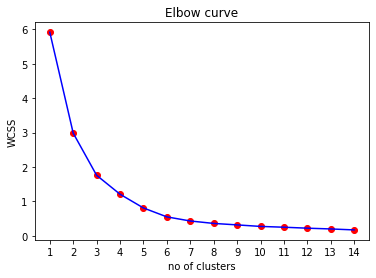

In [20]:
import matplotlib.pyplot as plt
plt.scatter(k,WCSS,c="red")
plt.plot(k,WCSS,c="blue")
plt.xticks(range(1,15,1))
plt.xlabel("no of clusters")
plt.ylabel("WCSS")
plt.title("Elbow curve")